In [1]:
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from concurrent.futures import ThreadPoolExecutor

In [2]:
subprocess.run("make")

make: Nothing to be done for `all'.


CompletedProcess(args='make', returncode=0)

In [5]:
try:
    df = pd.read_csv("tests/base/results.csv")
except:
    df = pd.DataFrame(columns=["difficulty", "algorithm", "iterations", "time"])
    for diff in ["mid1", "mid2", "hard"]:
        with open(f"tests/base/{diff}.txt", "r") as f:
            value = f.readline().strip().split()
            for opt in ["B", "I", "U", "A", "G"]:
                command = ["./bin/TP1", opt] + value
                print(" ".join(command))
                result = subprocess.run(command, capture_output=True, text=True)
                output = [int(val) for val in result.stdout.splitlines()[0].split()]
                df = df._append({
                    "difficulty": diff,
                    "algorithm": opt,
                    "iterations": output[0],
                    "time": output[1],
                }, ignore_index=True)
    df.to_csv("tests/base/results.csv", index=False)

In [4]:
df

,difficulty,algorithm,iterations,time
0,mid1,B,4631,44
1,mid1,I,146470,60
2,mid1,U,474,6
3,mid1,A,51,1
4,mid1,G,51,1
5,mid2,B,27947,269
6,mid2,I,864795,364
7,mid2,U,26695,336
8,mid2,A,126,3
9,mid2,G,262,6


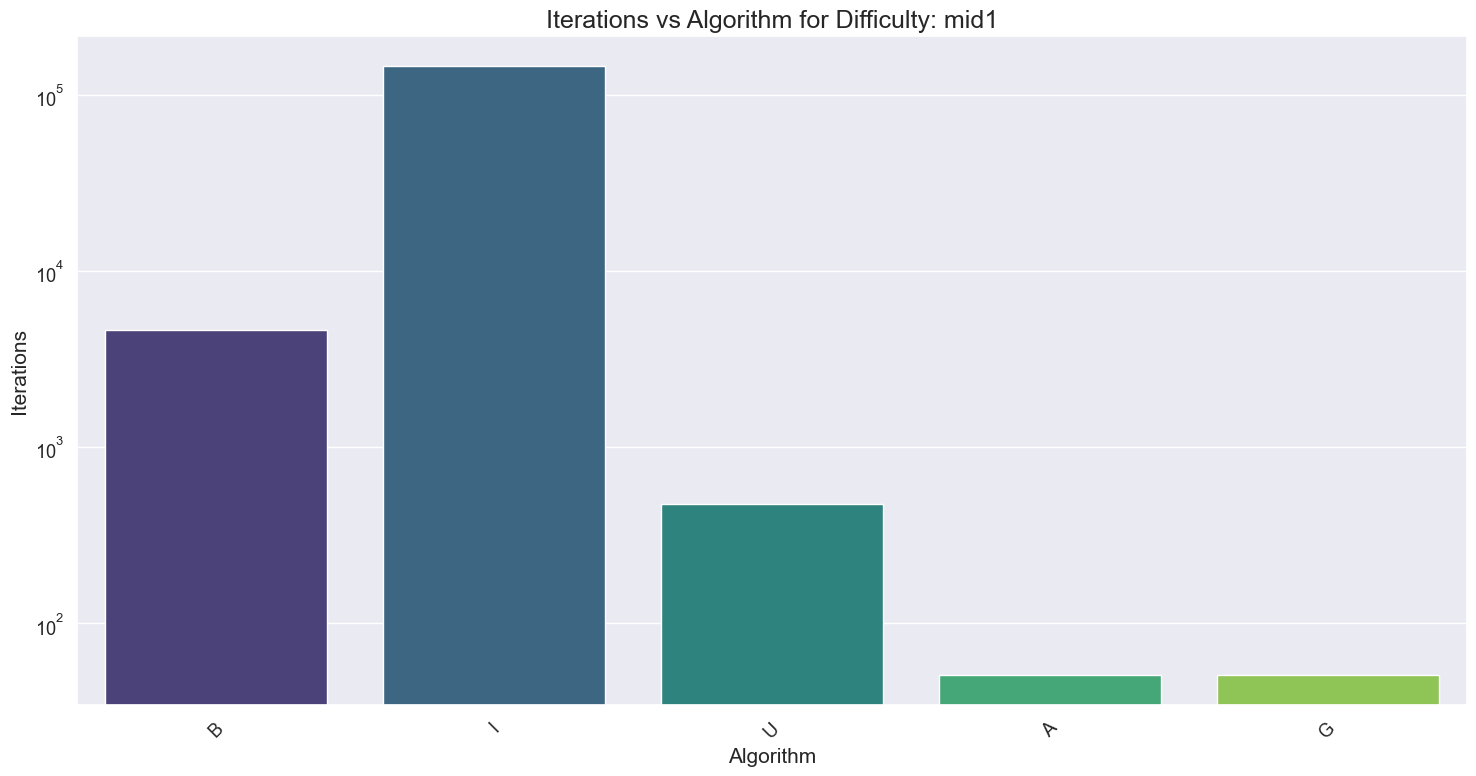

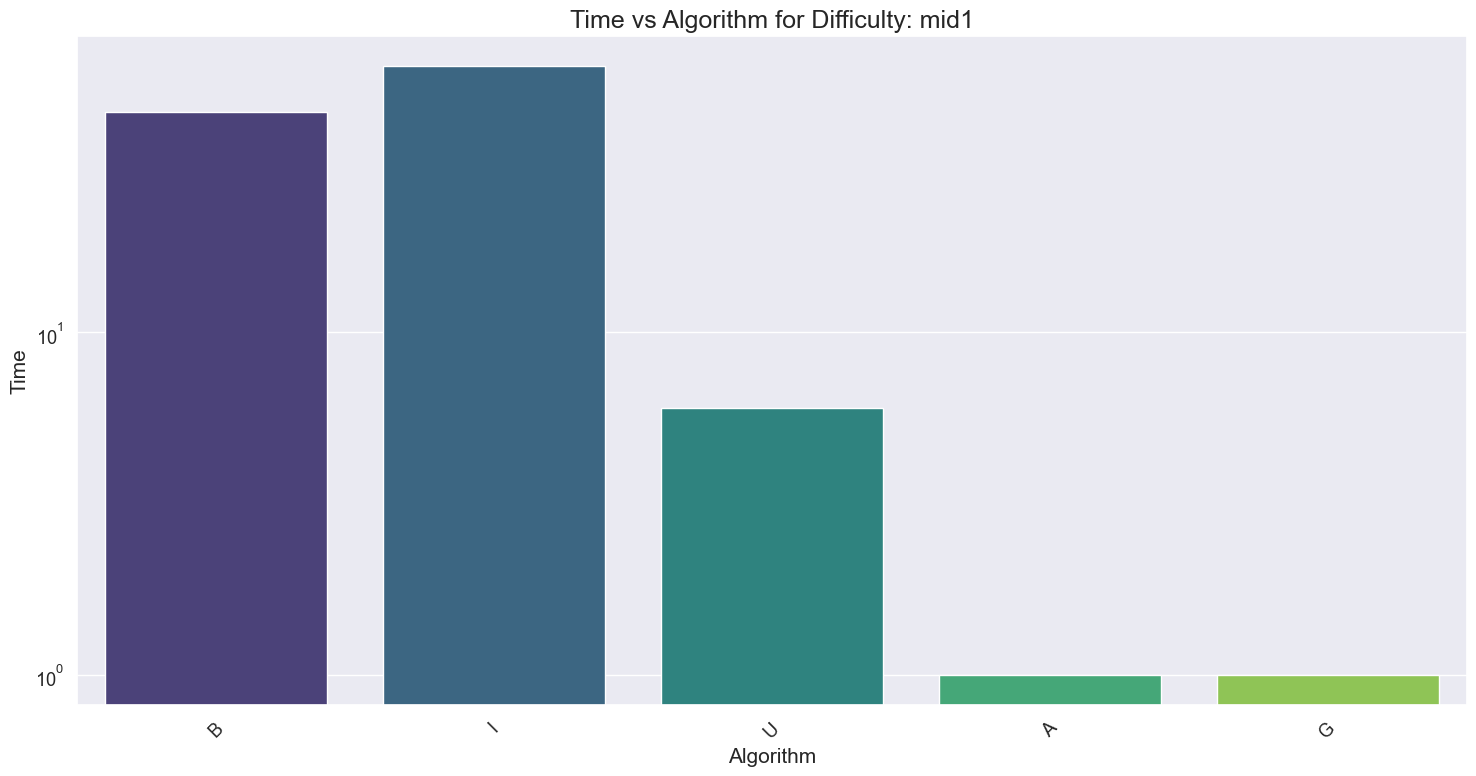

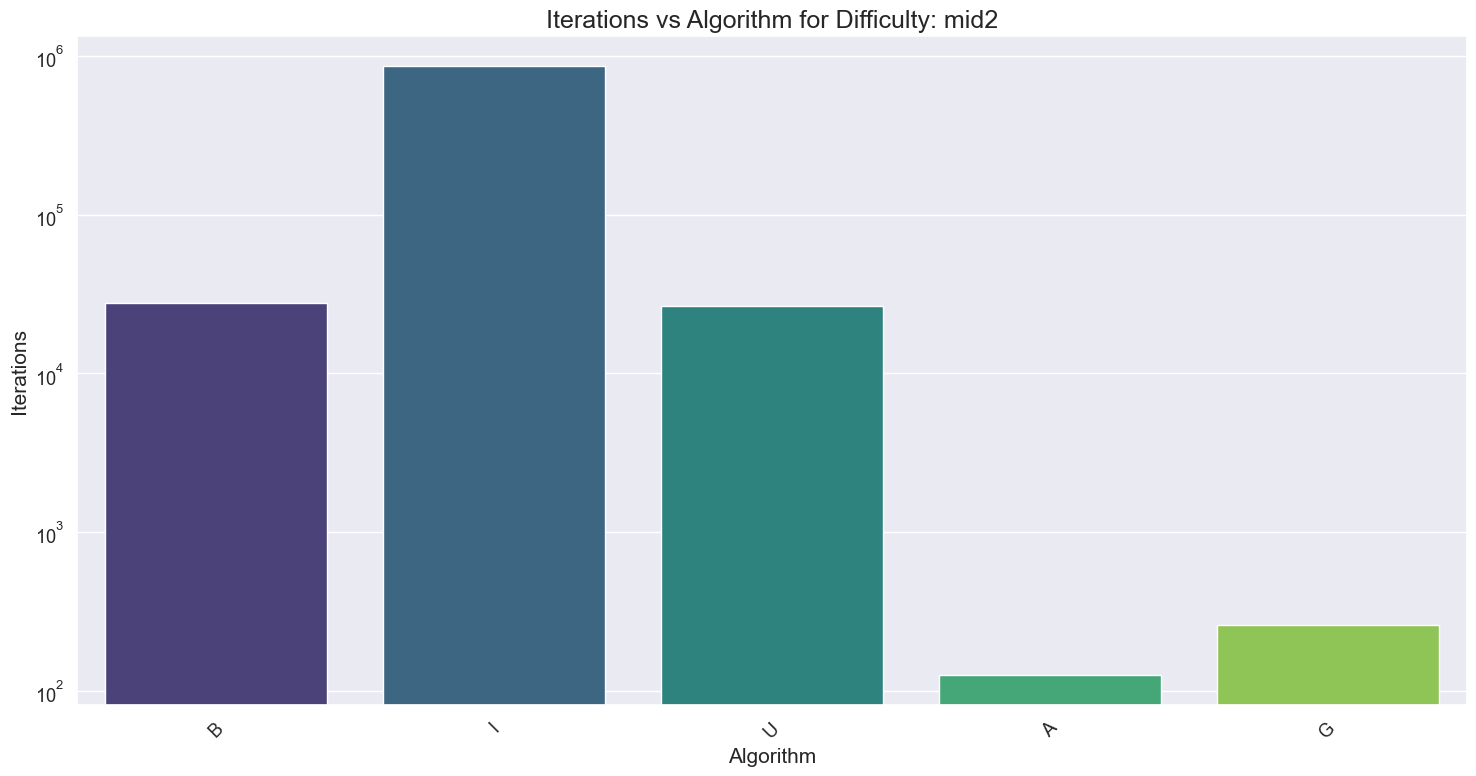

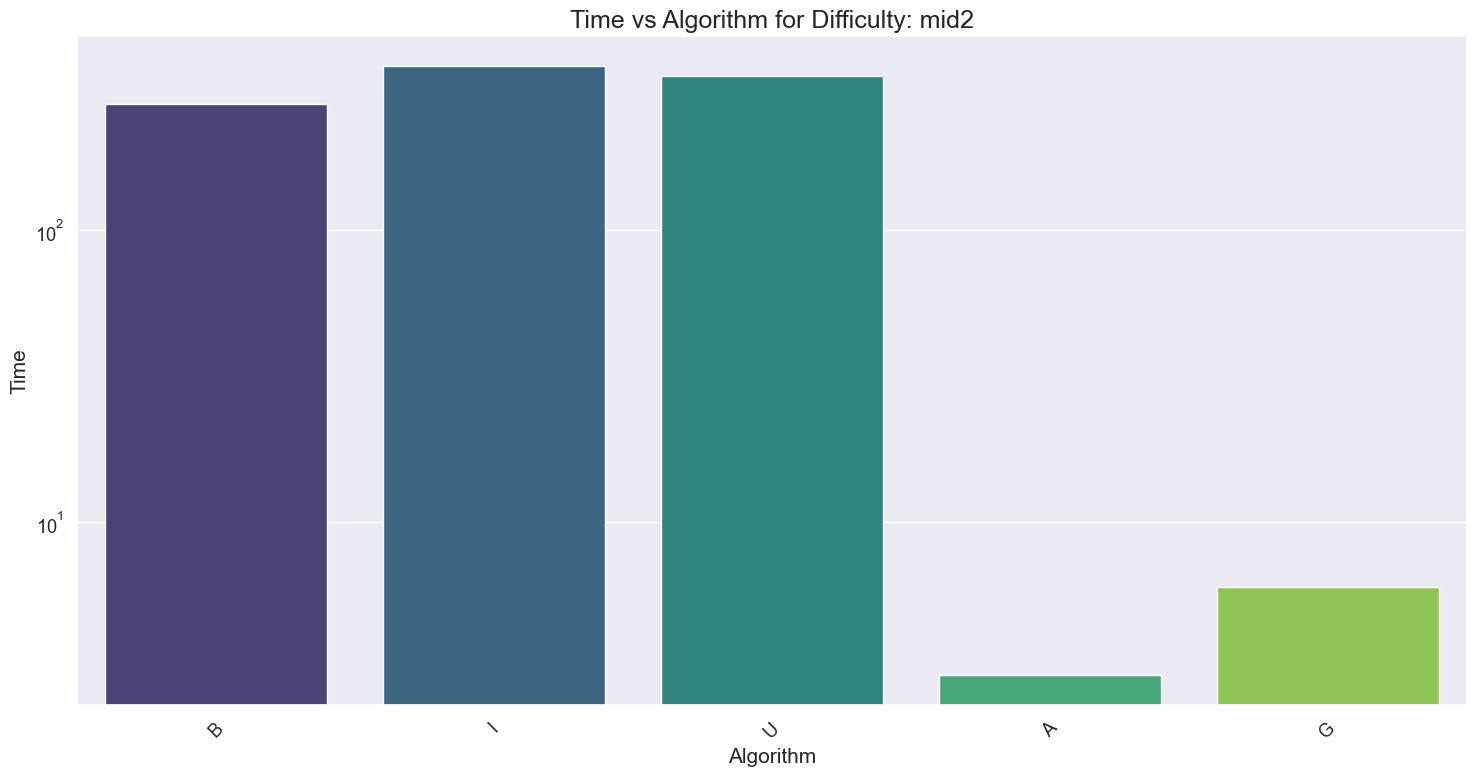

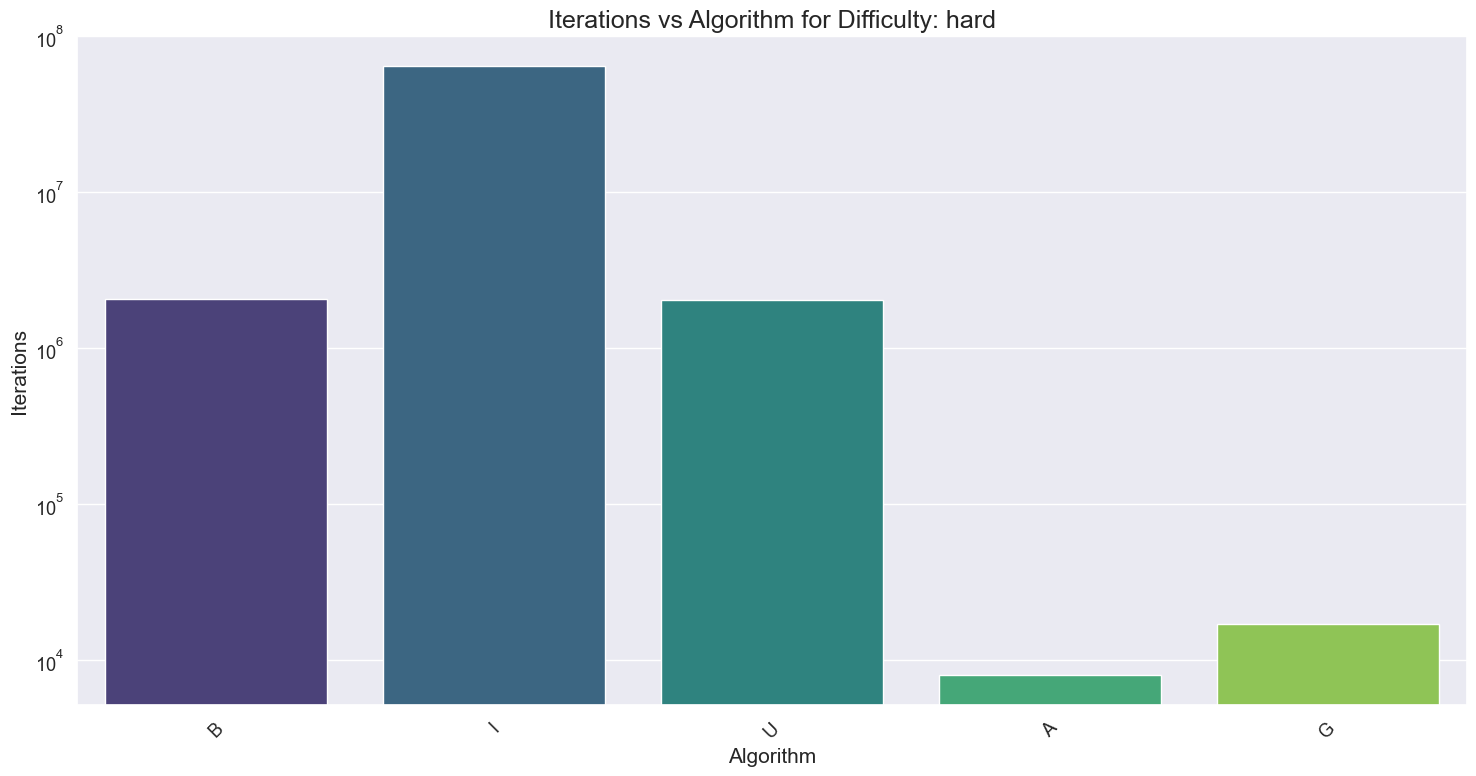

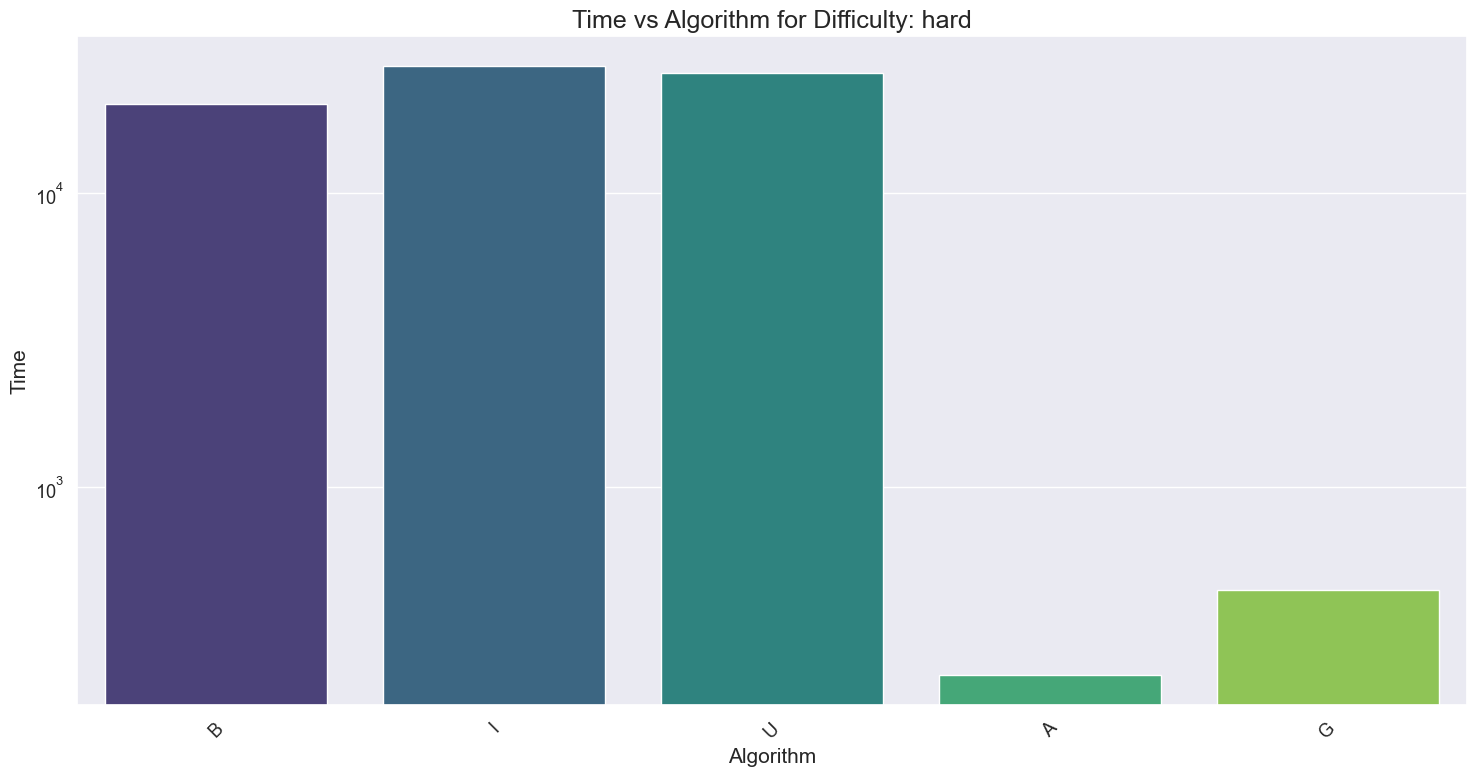

In [6]:
for difficulty in df['difficulty'].unique():
    sns.set_theme(font_scale=1.2)
    df_difficulty = df[df['difficulty'] == difficulty]
    
    plt.figure(figsize=(15, 8))
    sns.barplot(data=df_difficulty, x='algorithm', y='iterations', palette='viridis')
    plt.title(f'Iterations vs Algorithm for Difficulty: {difficulty}', fontsize=18)
    plt.xlabel('Algorithm', fontsize=15)
    plt.ylabel('Iterations', fontsize=15)
    plt.yscale("log")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'images/iterations_{difficulty}.png')
    plt.show()
    
    plt.figure(figsize=(15, 8))
    sns.barplot(data=df_difficulty, x='algorithm', y='time', palette='viridis')
    plt.title(f'Time vs Algorithm for Difficulty: {difficulty}', fontsize=18)
    plt.xlabel('Algorithm', fontsize=15)
    plt.ylabel('Time', fontsize=15)
    plt.yscale("log")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'images/time_{difficulty}.png')
    plt.show()

In [3]:
try:
    df2 = pd.read_csv("tests/examples/results.csv")
except:
    df2 = pd.DataFrame(columns=["difficulty", "algorithm", "iterations", "time"])
    for diff in ["easy", "mid", "hard"]:
        print(diff)
        with open(f"tests/examples/{diff}.txt", "r") as f:
            values = [val.strip().split() for val in f.readlines()]
            for val in values:
                for opt in ["B", "I", "U", "A", "G"]:
                    command = ["./bin/TP1", opt] + val
                    print(" ".join(command))
                    result = subprocess.run(command, capture_output=True, text=True)
                    output = [int(res) for res in result.stdout.splitlines()[0].split()]
                    df2 = df2._append({
                        "difficulty": diff,
                        "algorithm": opt,
                        "iterations": output[0],
                        "time": output[1],
                    }, ignore_index=True)
    df2.to_csv("tests/examples/results.csv", index=False)

In [7]:
df2

,difficulty,algorithm,iterations,time
0,easy,B,43,0
1,easy,I,722,0
2,easy,U,43,0
3,easy,A,30,0
4,easy,G,30,0
...,...,...,...,...
145,hard,B,4825,49
146,hard,I,122645,51
147,hard,U,2468,35
148,hard,A,52,1


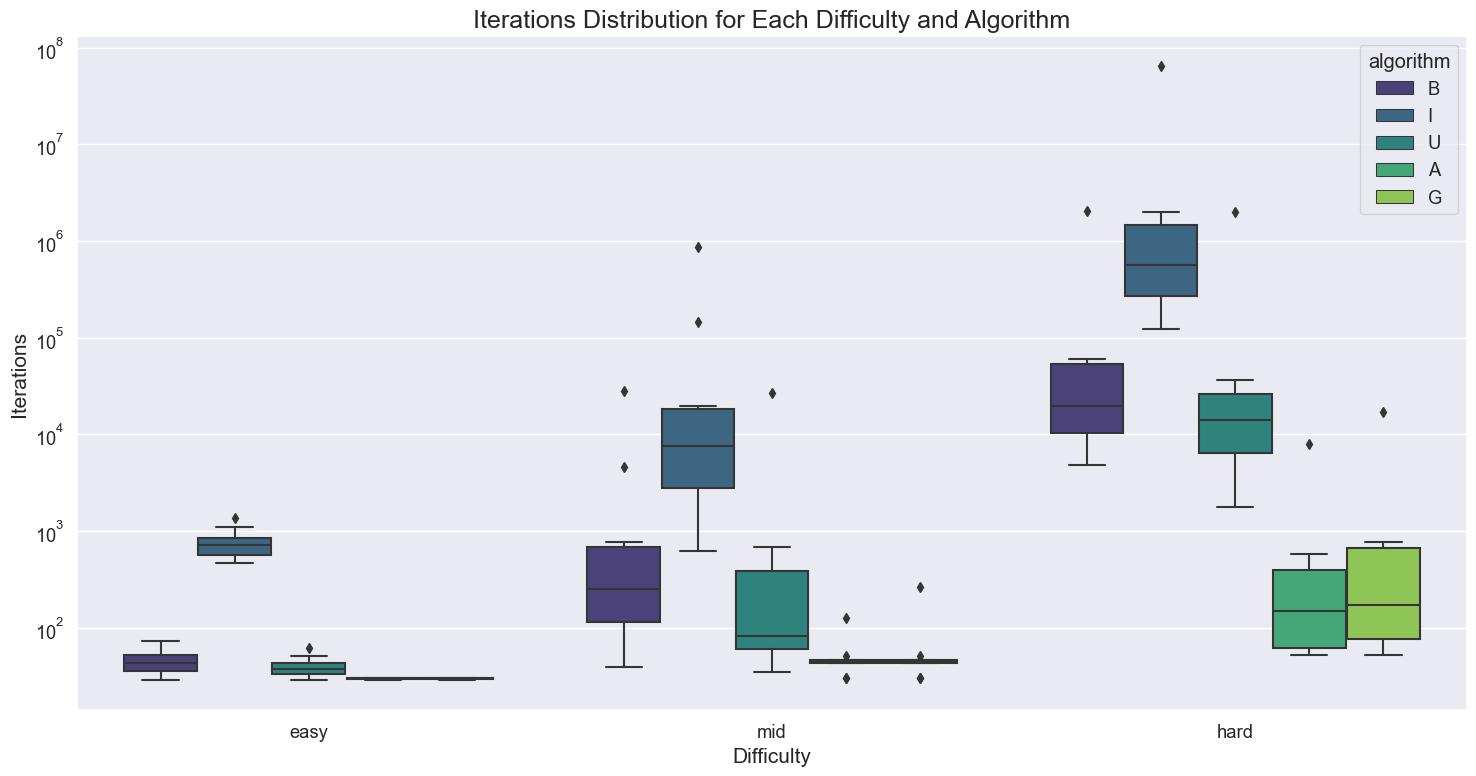

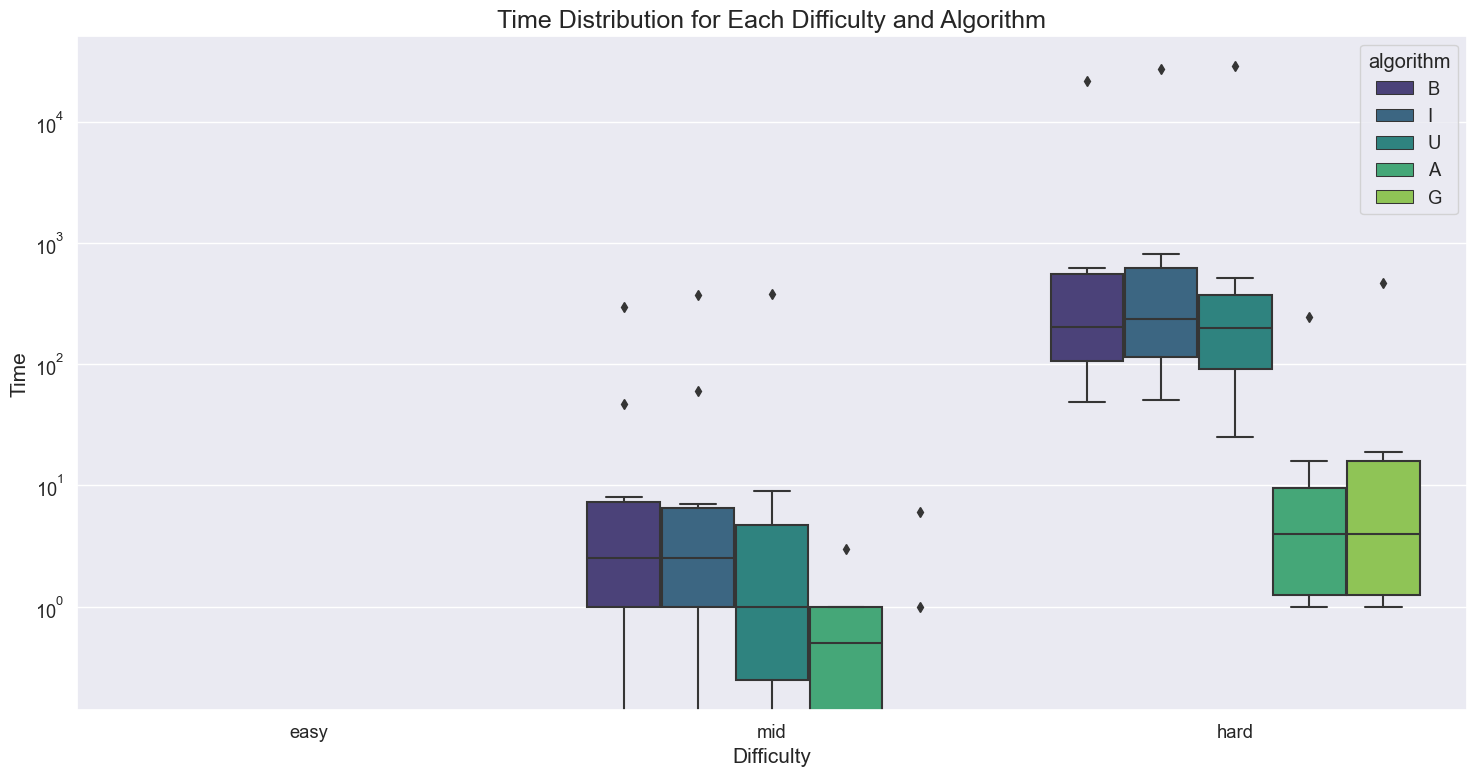

In [4]:
sns.set_theme(font_scale=1.2)
plt.figure(figsize=(15, 8))
sns.boxplot(data=df2, x='difficulty', y='iterations', hue='algorithm', palette='viridis')
plt.title('Iterations Distribution for Each Difficulty and Algorithm', fontsize=18)
plt.xlabel('Difficulty', fontsize=15)
plt.ylabel('Iterations', fontsize=15)
plt.yscale('log')
plt.tight_layout()
plt.savefig("images/iterations.png")
plt.show()

plt.figure(figsize=(15, 8))
sns.boxplot(data=df2, x='difficulty', y='time', hue='algorithm', palette='viridis')
plt.title('Time Distribution for Each Difficulty and Algorithm', fontsize=18)
plt.xlabel('Difficulty', fontsize=15)
plt.ylabel('Time', fontsize=15)
plt.yscale('log')
plt.tight_layout()
plt.savefig("images/times.png")
plt.show()